In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read "HR_comma_sep.csv" file and create data frame
df = pd.read_csv("HR_comma_sep.csv")
# Check the data frame
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Check the Data frame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Check the unique value of object column(sales)
print(df['sales'].unique())
print(df['sales'].value_counts())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [5]:
# Covert object column to integer using label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()
df['sales'] = label_encoder.fit_transform(df['sales']) # Covert object column to integer using label encoding
df['sales'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [6]:
# Apply One hot encoding to categorical variables(salary) using get_dummies()
df['salary'].unique()
#df['salary'] = label_encoder.fit_transform(df['salary']) # Covert object column to integer using label encoding
#df['salary'].unique()
df = pd.get_dummies(df, columns = ['salary'], drop_first=True, dtype='int', prefix = 'sal') # Covert object column to integer using One hot encoding
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,sal_low,sal_medium
0,0.38,0.53,2,157,3,0,1,0,7,1,0
1,0.80,0.86,5,262,6,0,1,0,7,0,1
2,0.11,0.88,7,272,4,0,1,0,7,0,1
3,0.72,0.87,5,223,5,0,1,0,7,1,0
4,0.37,0.52,2,159,3,0,1,0,7,1,0


In [7]:
# Check data distribution to decide whether scaling is needed for the data or not
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,sal_low,sal_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000


## 1. Perform data quality checks by checking for missing values, if any.

In [8]:
#check if there is any columns having missing value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
sal_low                  0
sal_medium               0
dtype: int64

#### Conclusion:- There is no missing value in any of the column. So, no need to fill default value to any column.

## 2. Understand what factors contributed most to employee turnover at EDA

#### 2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

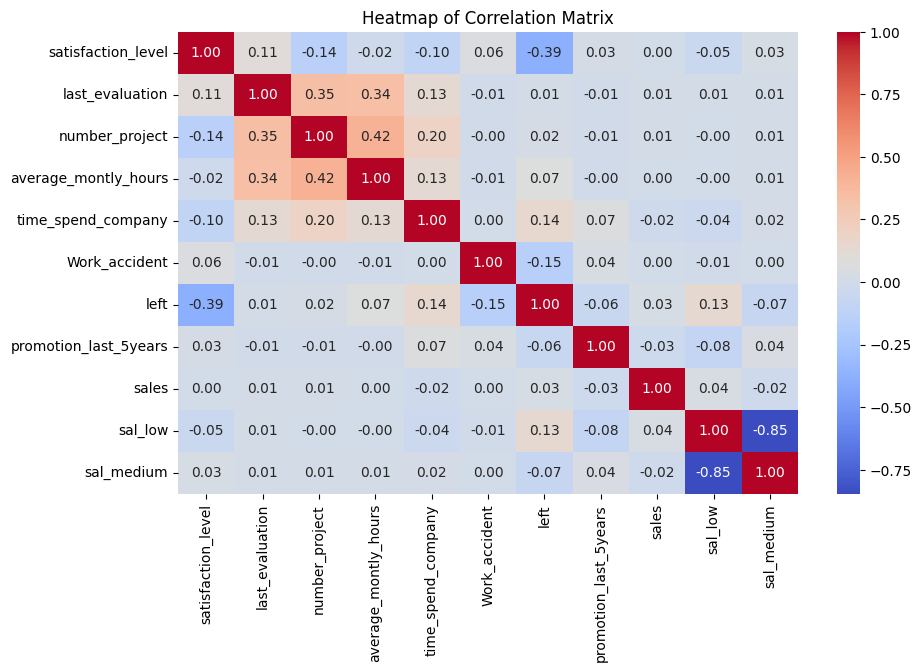

In [9]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Define Title and display the plot
plt.title('Heatmap of Correlation Matrix')
plt.show() # Display Heatmap to visualize co-relation

#### 2.2. Draw the distribution plot of Employee Satisfaction (use column satisfaction_level)

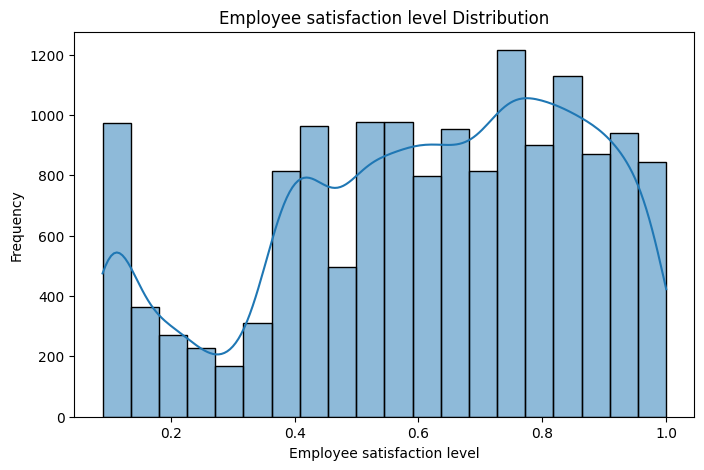

In [10]:
#Draw Distribution Plot for Employee satisfaction level using histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['satisfaction_level'], bins=20, kde=True)
plt.title('Employee satisfaction level Distribution')
plt.xlabel('Employee satisfaction level')
plt.ylabel('Frequency')
plt.show()

#### 2.2. Draw the distribution plot of Employee Evaluation (use column last_evaluation)

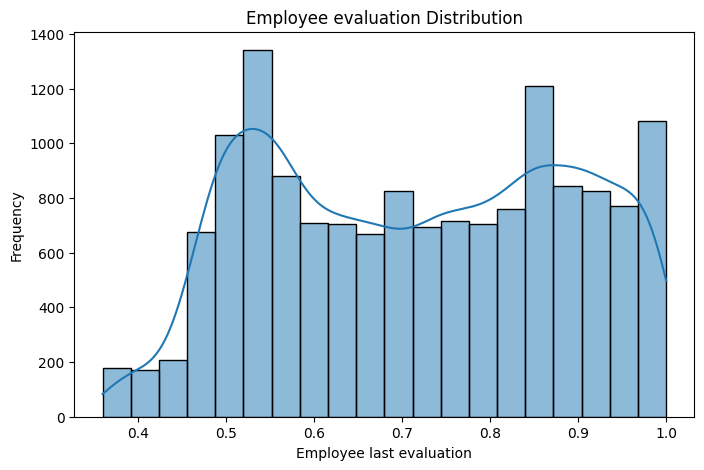

In [11]:
#Draw Distribution Plot for Employee last evaluation using histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['last_evaluation'], bins=20, kde=True)
plt.title('Employee evaluation Distribution')
plt.xlabel('Employee last evaluation')
plt.ylabel('Frequency')
plt.show()

#### 2.2. Draw the distribution plot of Employee Average Monthly Hours (use column average_montly_hours)

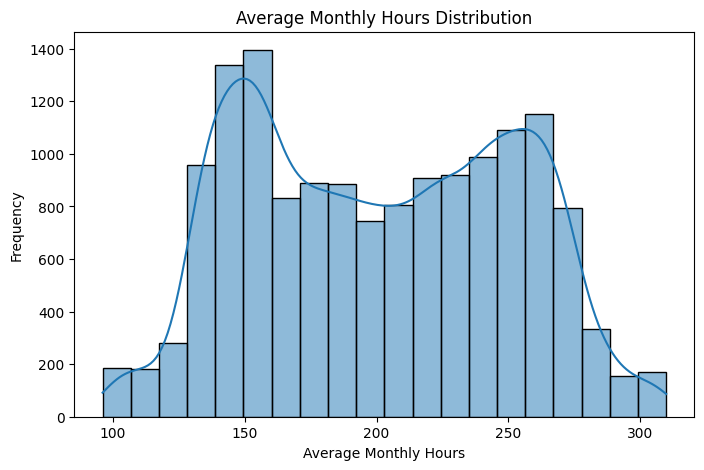

In [12]:
#Draw Distribution Plot for Employee Average monthly hours using histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['average_montly_hours'], bins=20, kde=True)
plt.title('Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

#### 2.3. Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left)

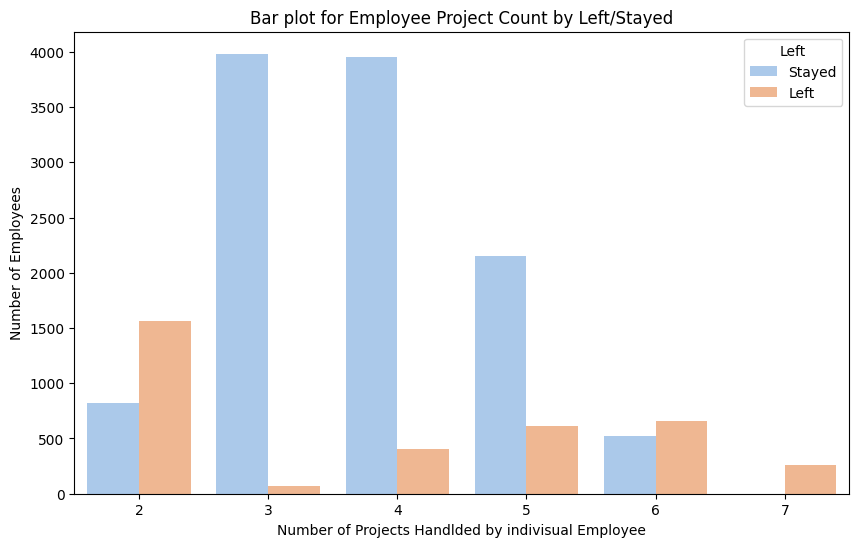

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_project', hue='left', palette='pastel')
plt.title('Bar plot for Employee Project Count by Left/Stayed')
plt.xlabel('Number of Projects Handlded by indivisual Employee')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

#### Conclusion:- From the above bar plots it shows that people who were handling more project has less satisfaction level and because of that they left the company. ##

## 3. Perform clustering of employees who left based on their satisfaction and  evaluation.

#### 3.1. Choose columns satisfaction_level, last_evaluation, and left.

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter employees who left the company based on satisfaction_level and last_evaluation
left_employees = df[df['left'] == 1][['left', 'satisfaction_level', 'last_evaluation']]

left_employees.head()

,left,satisfaction_level,last_evaluation
0,1,0.38,0.53
1,1,0.80,0.86
2,1,0.11,0.88
3,1,0.72,0.87
4,1,0.37,0.52


#### 3.2. Do K-means clustering of employees who left the company into 3 clusters?

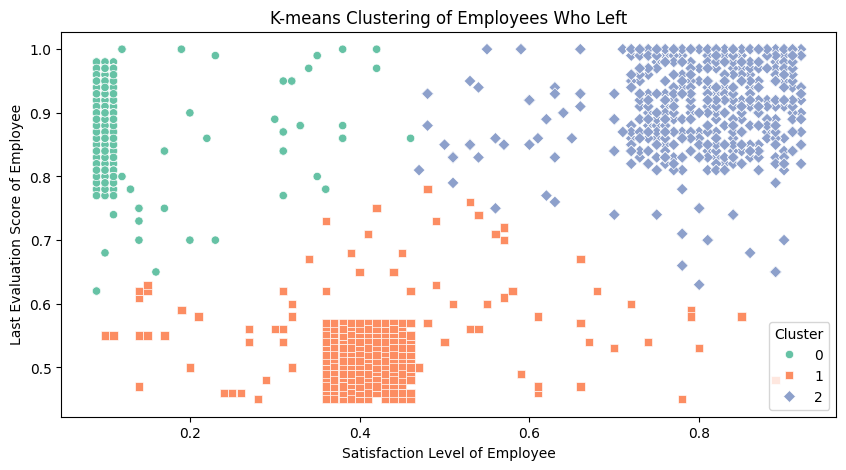

In [15]:
# Since data is not distributed properly as we checked earlier using df.describe(). Need to perform scaling.
# Do perform scaling, we will be using StandardScaler of preprocessing
scaler = StandardScaler()
left_employees_scaled = scaler.fit_transform(left_employees)
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123)
left_employees['cluster'] = kmeans.fit_predict(left_employees_scaled)

#Create scatter plot using K-Means clustering for the employee who left 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set2', style='cluster', markers=['o', 's', 'D'])
plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level of Employee')
plt.ylabel('Last Evaluation Score of Employee')
plt.legend(title='Cluster')
plt.show() #Visulaize the employee who left the company

#### 3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

#### Cluster 0: May consist of employees with low satisfaction and low evaluation scores. This group likely represents the highest risk for turnover, indicating potential burnout or dissatisfaction.
#### Cluster 1: This cluster may contain employees with moderate satisfaction and evaluation scores. They might be at a transitional stage where improvements could either retain them or push them to leave.
#### Cluster 2: Employees in this cluster likely have high satisfaction and high evaluation scores. This group is less likely to leave and may represent the organization's strong performers.

## 4. Handle the left Class Imbalance using the SMOTE technique.

#### 4.1. Pre-process the data by converting categorical columns to numerical columns by:
####      ■ Separating categorical variables and numeric variables
####      ■ Applying get_dummies() to the categorical variables
####      ■ Combining categorical variables and numeric variables

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and Target variable (Y)
X = df.drop('left', axis=1)  # Features
Y = df['left']  # Target variable

print(X.head(), Y.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales  sal_low  \
0                   3              0                      0      7        1   
1                   6              0                      0      7        0   
2                   4              0                      0      7        0   
3                   5              0                      0      7        1   
4                   3              0                      0      7        1   

   sal_medium  
0           0  
1           

#### 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [17]:
# Perform train test split method to create training and testing data set to evaluate the model performance.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((14999, 10), (14999,), (11999, 10), (11999,), (3000, 10), (3000,))

#### 4.3. Upsample the train dataset using the SMOTE technique from the imblearn module

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)

# Upsample the train data set using SMOTE technique with (X_train, Y_train)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Check the sampled data after SMOTE technique
print(f'Training set class distribution: , {Y_train.value_counts()}')
print(f'Resampled training set class distribution: , {Y_train_resampled.value_counts()}')

Training set class distribution: , left
0    9137
1    2862
Name: count, dtype: int64
Resampled training set class distribution: , left
0    9137
1    9137
Name: count, dtype: int64


## 5. Perform 5-fold cross-validation model training and evaluate performance

In [19]:
# Define Function to Plot Classification Report.
# This is the common method which will be used to generate classification report for all models.
def generate_classification_report(Y_train, Y_pred, title):
    report = classification_report(Y_train, Y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

#### 5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report

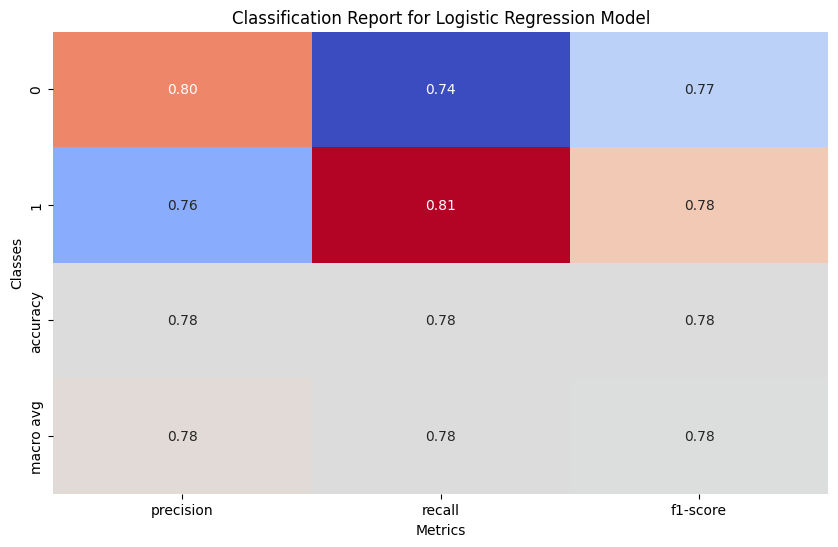

In [20]:
# Import necessary libraries/methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define number of folds
number_of_folds = 5

# Create Logistic Regression model with max_iter=1000
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, Y_train)

# Create Stratified K-Folds model with n_splits=5, shuffle=True, random_state=123
skf = StratifiedKFold(n_splits=number_of_folds, shuffle=True, random_state=123)

# Cross-validation predictions
Y_pred_score_log = cross_val_predict(log_model, X_train_resampled, Y_train_resampled, cv=skf)

# Plot the classification report using defined method above (generate_classification_report)
generate_classification_report(Y_train_resampled, Y_pred_score_log, "Classification Report for Logistic Regression Model")

#### 5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report

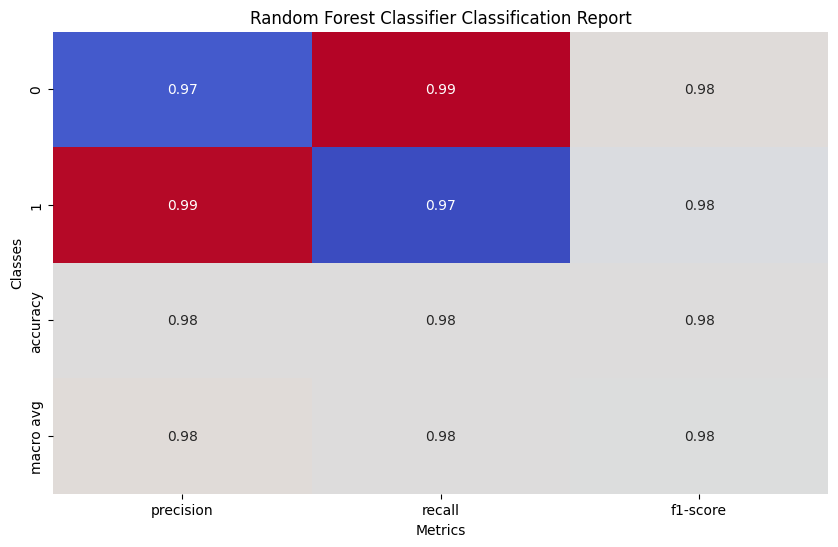

In [21]:
# Create Random Forest Classifier model using random_state=123
rf_model = RandomForestClassifier(random_state=123)
# Train the model
rf_model.fit(X_train, Y_train)

# Cross-validation predictions
Y_pred_rf = cross_val_predict(rf_model, X_train_resampled, Y_train_resampled, cv=skf)

# Plot the classification report
generate_classification_report(Y_train_resampled, Y_pred_rf, "Random Forest Classifier Classification Report")

#### 5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

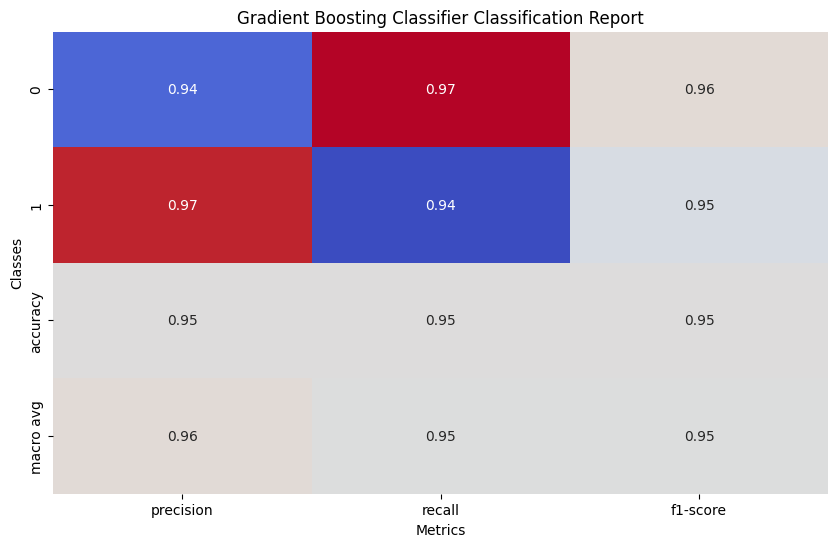

In [22]:
# Gradient Boosting Classifier with random_state=123
gb_model = GradientBoostingClassifier(random_state=123)
gb_model.fit(X_train, Y_train)

# Cross-validation predictions
Y_pred_gb = cross_val_predict(gb_model, X_train_resampled, Y_train_resampled, cv=skf)

# Plot the classification report
generate_classification_report(Y_train_resampled, Y_pred_gb, "Gradient Boosting Classifier Classification Report")

# 6. Identify the best model and justify the evaluation metrics used

#### 6.1. Find the ROC/AUC for each model and plot the ROC curve.

In [23]:
# Define a method to Generate roc_auc curve 
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

def generate_roc_auc_curve(Y_train, Y_scores, label):
    fpr, tpr, _ = roc_curve(Y_train, Y_scores)
    auc = roc_auc_score(Y_train, Y_scores)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
    return auc

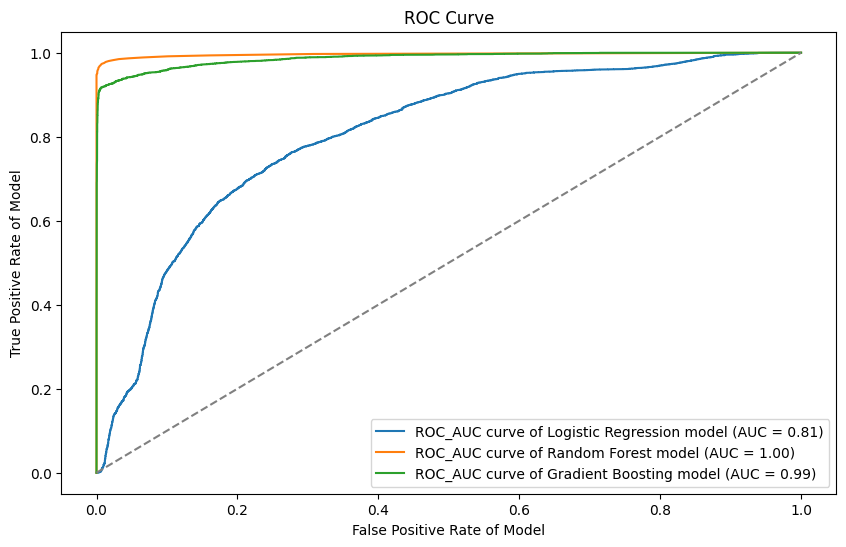

In [24]:
# Predictions from each model
Y_scores_log = log_model.predict_proba(X_train_resampled)[:, 1]  # return the predicted probabilities for each class
Y_scores_rf = rf_model.predict_proba(X_train_resampled)[:, 1] 
Y_scores_gb = gb_model.predict_proba(X_train_resampled)[:, 1]

plt.figure(figsize=(10, 6))
generate_roc_auc_curve(Y_train_resampled, Y_scores_log, 'ROC_AUC curve of Logistic Regression model')
generate_roc_auc_curve(Y_train_resampled, Y_scores_rf, 'ROC_AUC curve of Random Forest model')
generate_roc_auc_curve(Y_train_resampled, Y_scores_gb, 'ROC_AUC curve of Gradient Boosting model')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate of Model')
plt.ylabel('True Positive Rate of Model')
plt.legend()
plt.show()

#### 6.2. Find the confusion matrix for each of the models.

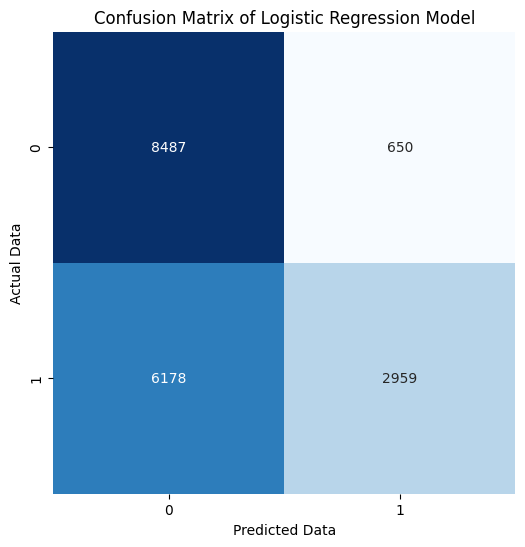

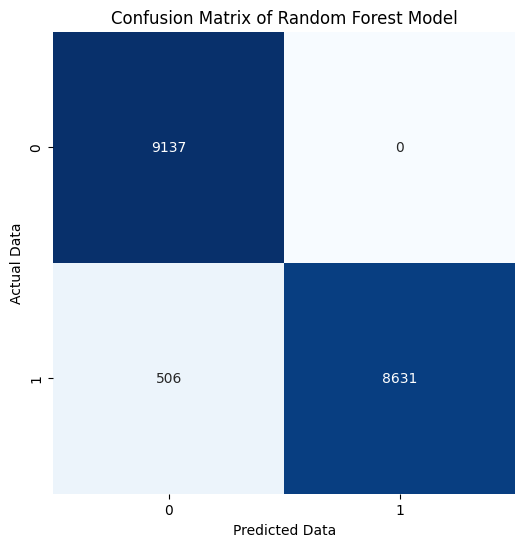

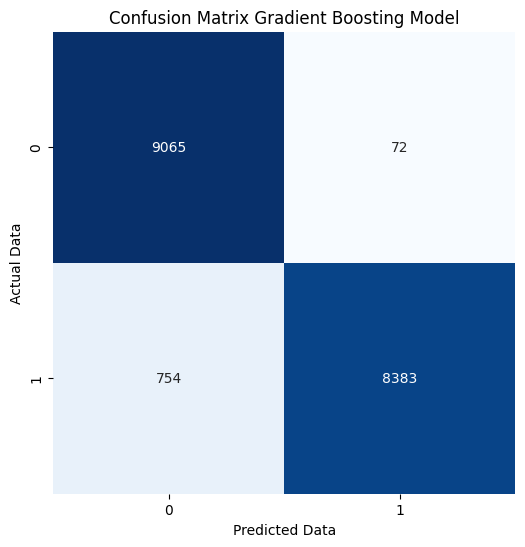

In [25]:
# Get predictions for confusion matrix
Y_pred_log = log_model.predict(X_train_resampled)
Y_pred_rf = rf_model.predict(X_train_resampled)
Y_pred_gb = gb_model.predict(X_train_resampled)

# Confusion matrices
confusion_matrix_log = confusion_matrix(Y_train_resampled, Y_pred_log)
confusion_matrix_rf = confusion_matrix(Y_train_resampled, Y_pred_rf)
confusion_matrix_gb = confusion_matrix(Y_train_resampled, Y_pred_gb)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.title(title)
    plt.ylabel('Actual Data')
    plt.xlabel('Predicted Data')
    plt.show()

plot_confusion_matrix(confusion_matrix_log, 'Confusion Matrix of Logistic Regression Model')
plot_confusion_matrix(confusion_matrix_rf, 'Confusion Matrix of Random Forest Model')
plot_confusion_matrix(confusion_matrix_gb, 'Confusion Matrix Gradient Boosting Model')

#### 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

#### Conclusion:- Recall is better in this case.

## 7. Suggest various retention strategies for targeted employees.

#### 7.1. Using the best model, predict the probability of employee turnover in the test data

In [26]:
# Predict probabilities for employee turnover on train Data for random forest tree as this model has identified as best model from bove tests
Y_pred_prob_train = rf_model.predict_proba(X_train)[:, 1]   # return the predicted probabilities for each class
print(f'Probability of employee turnover in the test data for identified best model(Random Forest Tree) is : {Y_pred_prob_train}')

# Predict probabilities for employee turnover on Test Data for random forest tree as this model has identified as best model from bove tests
Y_pred_prob_test = rf_model.predict_proba(X_test)[:, 1]   # return the predicted probabilities for each class
print(f'Probability of employee turnover in the test data for identified best model(Random Forest Tree) is : {Y_pred_prob_test}')

Probability of employee turnover in the test data for identified best model(Random Forest Tree) is : [0.   0.01 1.   ... 0.97 0.   0.  ]
Probability of employee turnover in the test data for identified best model(Random Forest Tree) is : [0. 0. 0. ... 1. 0. 0.]


#### 7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
####      ■ Safe Zone (Green) (Score < 20%)
####      ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
####      ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
####      ■ High-Risk Zone (Red) (Score > 90%)

In [27]:
# Create a DataFrame with Probability on train data
results = pd.DataFrame({
    'Index': X_train.index,
    'Probability': Y_pred_prob_train
})

# Define zones based on probability scores
def categorize_zone_based_on_probability(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= probability < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

results['Zone'] = results['Probability'].apply(categorize_zone_based_on_probability)

# Display results
print('Employee retention strategy based on data')
print(results)

Employee retention strategy based on data
       Index  Probability                  Zone
0       3553         0.00     Safe Zone (Green)
1       2112         0.01     Safe Zone (Green)
2       1794         1.00  High-Risk Zone (Red)
3      13885         0.00     Safe Zone (Green)
4      11250         0.00     Safe Zone (Green)
...      ...          ...                   ...
11994   5218         0.00     Safe Zone (Green)
11995  12252         0.95  High-Risk Zone (Red)
11996   1346         0.97  High-Risk Zone (Red)
11997  11646         0.00     Safe Zone (Green)
11998   3582         0.00     Safe Zone (Green)

[11999 rows x 3 columns]


In [28]:
# Create a DataFrame with predictions
results = pd.DataFrame({
    'last_evaluation': X_test.index,  
    'Probability': Y_pred_prob_test
})

# Define zones based on probability scores
def categorize_zone_based_on_probability(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= probability < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Call categorize_zone_based_on_probability method on Probability column of data frame and store the 
# results in additional columns RetentionZone
results['RetentionZone'] = results['Probability'].apply(categorize_zone_based_on_probability)

# Display results
print('Employee retention strategy based on data')
print(results)

Employee retention strategy based on data
      last_evaluation  Probability         RetentionZone
0                6958         0.00     Safe Zone (Green)
1                7534         0.00     Safe Zone (Green)
2                2975         0.00     Safe Zone (Green)
3                3903         0.11     Safe Zone (Green)
4                8437         0.00     Safe Zone (Green)
...               ...          ...                   ...
2995             1229         0.99  High-Risk Zone (Red)
2996            10593         0.00     Safe Zone (Green)
2997            12248         1.00  High-Risk Zone (Red)
2998             3147         0.00     Safe Zone (Green)
2999             6623         0.00     Safe Zone (Green)

[3000 rows x 3 columns]
